<p>1.Rigid body formulation using carden angle (mentioned in the paper), show pro/con versus using quaternion
<p>2.Show the formulation of body-joint and how it used to model the "Youbot robot"
<p>3.Study structure of Modia 3D based on ModiaLang and ModiaBase
<p>4.Study the solution sequence outlined in the paper andou the index reduction of DAE
<p>5.Study the solution sequence of ModiaLang Toolkit</p>

# 1.Rigid body formulation using carden angle

* Euler angles are useful to represent an aribitrary rotation in $R^3$ 
<p> R($\alpha$,$\beta$, $\gamma$ ) = Rot($\hat{z},\alpha$)Rot($\hat{y},\beta$)Rot($\hat{x},\gamma$)
<p>$Rot(\hat{z},\alpha)=\begin{bmatrix}cos\alpha& -sin\alpha & 0\\sin\alpha & cos\alpha & 0\\0 & 0 & 1\end{bmatrix}$   
<p>$Rot(\hat{y},\beta)=\begin{bmatrix}cos\beta& 0 & sin\beta\\0 & 1 & 0\\-sin\beta & 0 & cos\beta\end{bmatrix}$
<p>$Rot(\hat{x},\gamma)=\begin{bmatrix}1& 0& 0\\0 & cos\gamma & -sin\gamma\\0 & sin\gamma & cos\gamma\end{bmatrix}$
<p>$Rot(\alpha,\beta,\gamma)=\begin{bmatrix}cos\alpha \cdot cos\beta& cos\alpha \cdot sin\beta \cdot sin\gamma-sin\alpha \cdot cos\gamma& cos\alpha \cdot sin\beta \cdot cos\gamma+sin\alpha \cdot sin\gamma\\
sin\alpha \cdot cos\beta & sin\alpha \cdot sin\beta \cdot sin\gamma + cos\alpha \cdot cos\gamma & sin\alpha \cdot sin\beta \cdot cos\gamma - cos\alpha \cdot sin\gamma\\
-sin\beta & cos\beta \cdot sin\gamma & cos\beta \cdot cos\gamma\end{bmatrix}$


* Quaternion
<p>$q=a+bi +cj+dk =[s,v] (s-real, v-imaginary)$
<p>$i^2 = j^2 = k^2 =ijk =-1$
    
<!-- 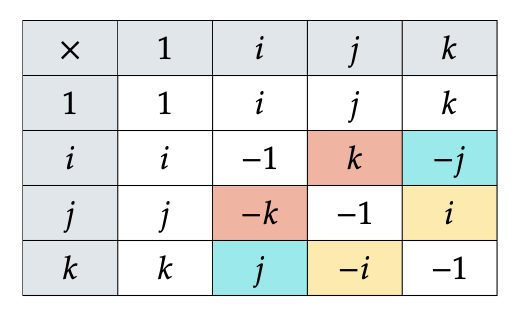 -->
    
  <div>
 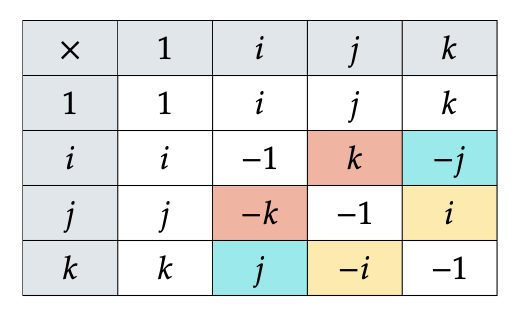
  </div>
  
    
$ q=a+bi +cj+dk =q_0 + q_1 i +q_2 j +q_3 k $ 
<p>$ v'= R\cdot v$
<p>$R=\begin{bmatrix}q_0^2 + q_1^2 -q_2^2 -q_3^2& 2(q_1 q_2-q_0q_3) & 2(q_0 q_2+q_1 q_3)\\ 2(q_0 q_3+q_1 q_2) & q_0^2 - q_1^2 +q_2^2 -q_3^2 &  2(q_2 q_3-q_0 q_1)\\ 2(q_1 q_3+q_0 q_2) &  2(q_0 q_1+q_2 q_3) & q_0^2 - q_1^2 -q_2^2 +q_3^2\end{bmatrix}$

<!-- 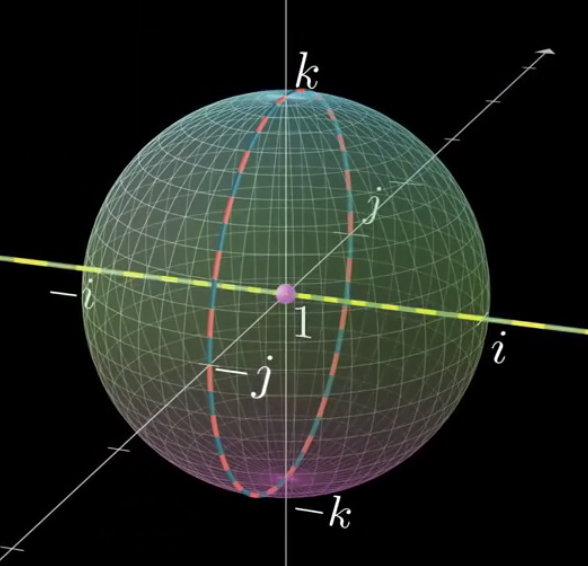 -->
    
    
 <div>
 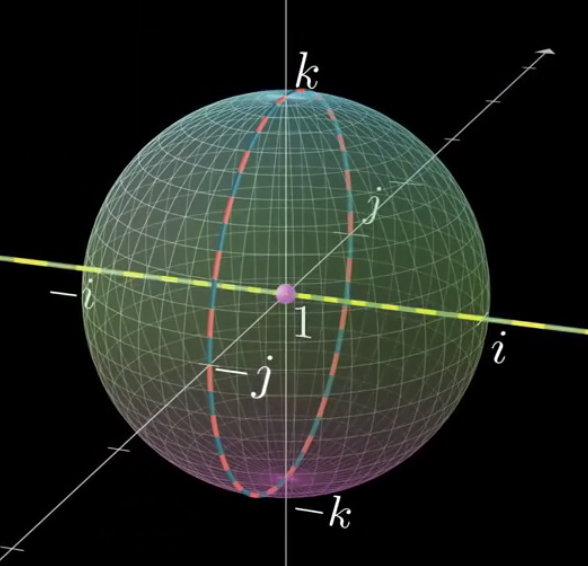
  </div>
  
  
<p> quaternion is the projection from 4 dimensional
<p> If s is positive, then the coordinate is inside the sphere while if s is negative, the coordinate is outside the sphere
<p> For unit vector in cartension system we can set s = 0, and v as the coordinate. eg: v for x-axis would be 1,0,0 so q for x-axis = [0,1,0,0]
<p> Rotating a vector $v$ along the axis $u$, rotating angle $\theta$, we can get $v'= q \cdot v \cdot q^* = [0,cos(\theta)v+(1-cos(\theta)(u\cdot v)u + sin(\theta)(u\times v))]$ that will give the same result as the matrix shown above.

* **Pro and con for Tait-Byran angles(Euler angle):**
<p>Pro: <br>1. State variables are illustrative for the user (intuitive) <br>  2. Tait-Byran angles do not introduce nonlinear algebraic constraints and are directly defined in ODE form. (If the main rotation is approximately around one axis Tait-Byran angles behave nearly linear, so that integrators with adaptive step size selection can use larger steps compared to a description with quaternions.)<br>
<p>Con: Gimbal lock (When the second rotation about the local y-axis is $α_2 = 90^◦ +n · 180^◦$  where $n ∈ Z$, x- and z-axes are parallel.) The default hierachy order is x-y-z, which means when x rotates, y and z axis are rotating with x; when y rotats, z rotating with y; when z rotates, only it self rotating
                              
<!--     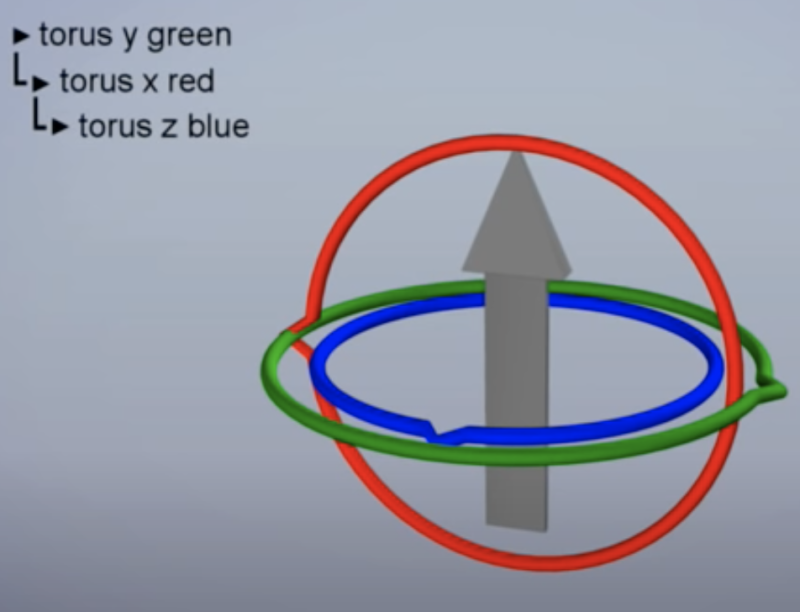 -->
    
  <div>
 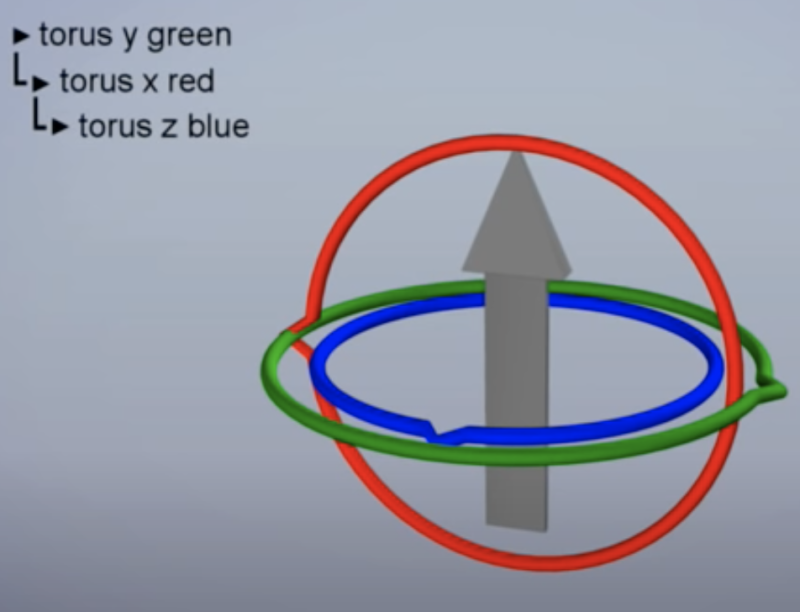
  </div>
     
Solution: In Modia3D this situation is avoided by adaptive rotation sequence handling (change hierarchy of axis when we are close to gimbal lock situation, eg, x-y-z to y-x-z )

# 2. Formulation of body-joint and how it used to model the "Youbot robot"

<p> For $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}$, Bracket $\omega$:
    $[\omega] = \begin{bmatrix} 0 & -\omega_3 & \omega_2 \\ \omega_3 & 0 & -\omega_1 \\ -\omega_2 & \omega_1 & 0\end{bmatrix}$. <br> Screw axes $S_i=(\omega_i,v_i).$ Furthermore, bracket of the screw axes $[S_i] = \begin{bmatrix} [\omega_i]&v_i \\ 0 & 0\end{bmatrix} $ <br> Trasformation matrix of end-effector: $T=e^{[s_1]\theta_1}e^{[s_2]\theta_2}e^{[s_3]\theta_3}...\cdot M$, where M is the stationary position.

Example: Youbot(dummy parameters from "module YouBotsGripping") 

<!-- 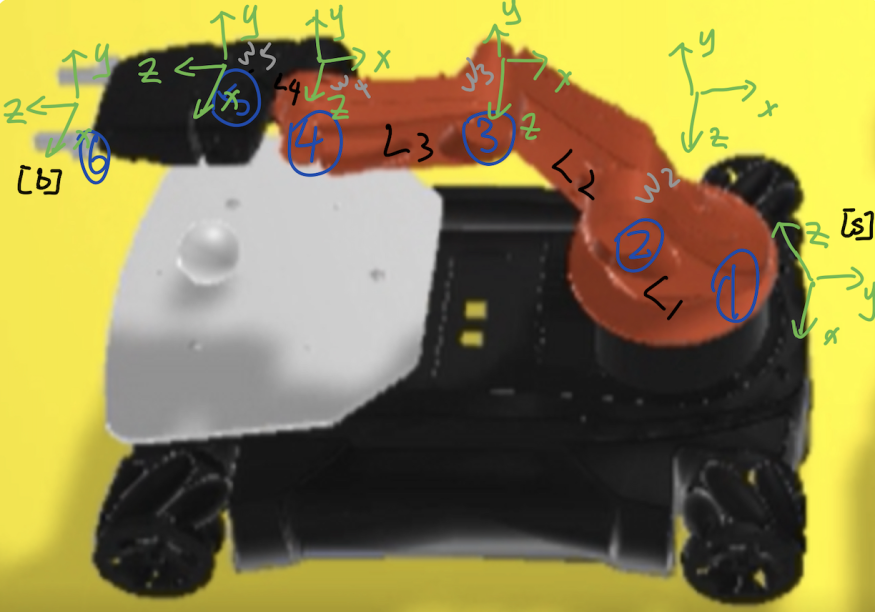 -->

 <div>
 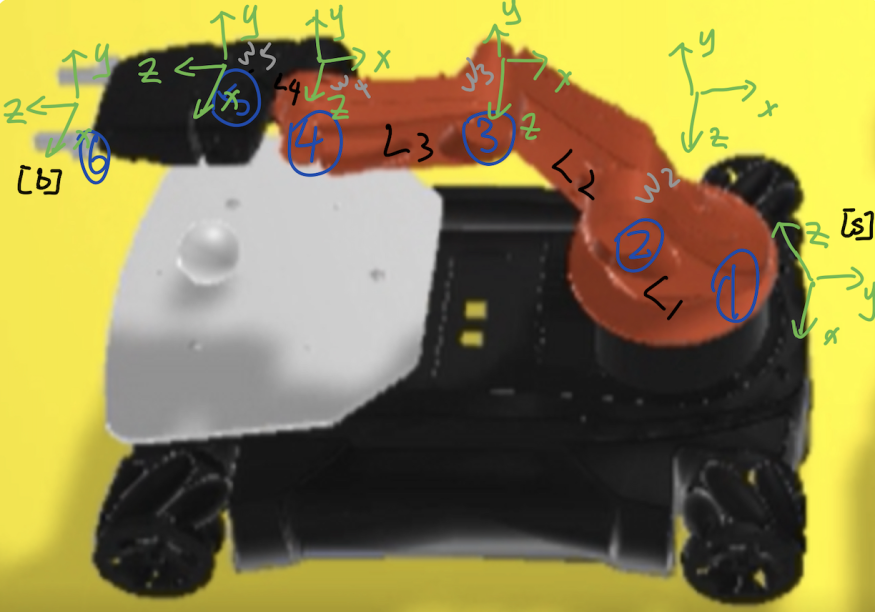
 </div>
  


$M = \begin{bmatrix}1&0&0&-W_2+W_3-W_4+W_5\\0&0&-1&0\\0&1&0&L_1+L_2+L_3+L_4+L_5\\0&0&0&1 \end{bmatrix}$

The screw axes for Youbot $S_i=(\omega_i,v_i), i =1,.....6$ are

| i | $w_i$ | $v_i$ |
| :--: | :---: | :---: |
| 1 | ( 0, 0, 1 ) | ( 0, 0, 0 )
| 2| ( 1, 0, 0 ) | ( 0, L_1, 0 ) |
| 3| ( 1, 0, 0 ) | ( 0, L_1+L2, 0 ) |
| 4 | ( 1, 0, 0 ) | ( 0, L_1+L2+L3, 0 ) |
| 5 | ( 0, 0, 1 ) | ( 0, W2-W3+W4-W5, 0 ) |
| 6 | ( 0, 0, 0 ) | ( 1, 0, 0 ) |


<p> EndEffector Position: Multiply the homogeneous matrices of each frame together (current frame transformations) to get the transformation $T_{sb}$ base to end effector.<br> Position of the end-effector wrb to [S] is then given by the 4th column [x , y , z , 1 ]. 

In [4]:
# A = [1 2;3 4]
# exp(A)
# ℯ^A #\euler + Tab



# function to compute [S]
function bracket(omega,v)
    return [0 -omega[3] omega[2] v[1]; omega[3] 0 -omega[1] v[2];-omega[2] omega[1] 0 v[3]; 0 0 0 0]
#     return [0 -omega[3] omega(2) v(1); omega(3) 0 -omega(1) v(2);-omega(2) omega(1) 0 v(3); 0 0 0 0]
end
# a = [1 2 3];b= [5 0 0]
# bracket(a,b)

L1=1;L2=2;L3=2;L4=1;L5=1.5
W2=1;W3=1;W4=1;W5=0.5
omega1=[0 0 1];omega2=[1 0 0];omega3=[1 0 0];omega4=[1 0 0];omega5=[0 0 1];omega6=[0 0 0]
v1=[0 0 0];v2=[0 L1 0];v3=[0 L1+L2 0];v4=[0 L1+L2+L3 0];v5=[0 W2-W3+W4-W5 0];v6=[1 0 0]
BrS1=bracket(omega1,v1)
BrS2=bracket(omega2,v2)
BrS3=bracket(omega3,v3)
BrS4=bracket(omega4,v4)
BrS5=bracket(omega5,v5)
BrS6=bracket(omega6,v6)
M=[1 0 0 -W2+W3-W4+W5; 0 0 -1 0; 0 1 0 L1+L2+L3+L4+L5; 0 0 0 1]
Theta=[pi -pi/4 -pi/4 -1.057 0 0]
T = ℯ^(BrS1*Theta[1])*ℯ^(BrS2*Theta[2])*ℯ^(BrS3*Theta[3])*ℯ^(BrS4*Theta[4])*ℯ^(BrS5*Theta[5])*ℯ^(BrS6*Theta[6])*M
Position = T[1:3,4]
Position #End-effectpr position with respect to frame [s]

3-element Vector{Float64}:
  0.4999999999999987
 -4.64293092352121
  0.23700120561659155

# 3.Study structure of Modia 3d based on ModiaLang and ModiaBase

<!--  <div>
 <img src="attachment:image.png" width="200"/>
     </div> -->
<!--     <img src=""> -->

***ModiaLang**: ModiaLang is a minimalistic environment in form of a Julia package to model and simulate physical systems (electrical, mechanical, thermo-dynamical, etc.) described by differential and algebraic equations. A model component is constructed by "expression = expression" equations.https://juliahub.com/docs/ModiaLang/R9zzo/0.7.2/autodocs/


**ModiaLang.simulate!—Method**

In [7]:
import ModiaLang
ModiaLang.simulate!(model [, algorithm]; merge = nothing,
          tolerance = 1e-6, startTime = 0.0, stopTime = 1.0, interval = NaN,
          adaptive = true, log = true, logParameters = true, logStates = true,
          requiredFinalStates = nothing)

LoadError: syntax: space before "[" not allowed in "model [" at In[7]:2

**Instantiate model**:Needs to be done before simulate the model, basically just opening one part of memory space for that model
<br>firstOrder = @instantiateModel(FirstOrder2, logCode=true)

**Map:  Setting and modifying parameters of components and attributes of variables (Modify parameters and initial values of model)**, keep the model but change some parameters inside the model(change or modify the component already in the system)
<br>FirstOrder2 = FirstOrder | Map(T = 0.4, x = Var(init=0.6))

**Merge: Define parameters and init/start values that shall be merged with the previous values stored in model, before simulation is started.**
The used **merge operator |** is an overloaded binary operator of bitwise or with recursive merge semantics. eg: dict1 = {'a': 10, 'b': 5, 'c': 3}; dict2 = {'d': 6, 'c': 4, 'b': 8}; dict3 = dict1 | dict2; dict3 = {'a': 10, 'd': 6, 'c': 4, 'b': 8} (replacing all same elements to dict2) <br>
**Der：** derivative

In [1]:
#example of ModiaLang.simulate! and map
using Modia
@usingModiaPlot #ENV["MODIA_PLOT"] = "PyPlot"  # Use plot package defined with 
Modia.usePlotPackage("PyPlot")           # ENV["MODIA_PLOT"] or Modia.usePlotPackage(..)

Pendulum = Model(
   L = 0.8u"m",
   m = 1.0u"kg",
   d = 0.5u"N*m*s/rad",
   g = 9.81u"m/s^2",
   phi = Var(init = 1.57*u"rad"),
   w   = Var(init = 0u"rad/s"),
   equations = :[
          w = der(phi)
        0.0 = m*L^2*der(w) + d*w + m*g*L*sin(phi)
          r = [L*cos(phi), -L*sin(phi)]
   ]
)
Pendulum = Pendulum | Map(L = 0.5u"m")
pendulum1 = @instantiateModel(Pendulum)
simulate!(pendulum1, Tsit5(), stopTime = 10.0u"s", log=true)
# ENV["MODIA_PLOT"] = "PyPlot"
# ModiaResult.activate("PyPlot")
ModiaPlot_PyPlot.plot(pendulum1, [("phi", "w"); "r"], figure = 1)


... Info: ENV["DLR_VISUALIZATION"] is not defined.
          Therefore, no online renderer is used in Modia3D.

import ModiaLang.ModiaResult.NoPlot: plot, showFigure, saveFigure, closeFigure, closeAllFigures

┌ Warning: No plot package activated. Using "NoPlot".
└ @ ModiaLang C:\Users\clair\.julia\packages\ModiaLang\1KLww\src\SimulateAndPlot.jl:51




Instantiating model Main.Pendulum
... Simulate model Pendulum
      Initialization at time = 0.0 s
      Termination of Pendulum at time = 10.0 s
        cpuTime         = 4.97 s
        allocated       = 533.0 MiB
        algorithm       = Tsit5
        FloatType       = Float64
        interval        = 0.02 s
        tolerance       = 1.0e-6 (relative tolerance)
        nStates         = 2
        nResults        = 501
        nGetDerivatives = 1416 (total number of getDerivatives! calls)
        nf              = 913 (number of getDerivatives! calls from integrator)
        nZeroCrossings  = 0 (number of getDerivatives! calls for zero crossing detection)
        nJac            = 0 (number of Jacobian computations)
        nAcceptedSteps  = 152
        nRejectedSteps  = 0
        nErrTestFails   = 0
        nTimeEvents     = 0
        nStateEvents    = 0
        nRestartEvents  = 0


LoadError: UndefVarError: ModiaPlot_PyPlot not defined

* **Reference :( ).** If the value has references to other declared variables in the model, the expressions needs to be quoted that is enclosed in **:( ).**
* **Parent** refers to the reference system of the object <br>
* A **RevoluteWithFlange** joint, that is a revolute joint with a flange, constrains the motion of axle with respect to world so that axle can only rotate around its z-axis. That rotates **obj1::Object3D** into **obj2::Object3D** along the axis axis of **obj1** (From my understanding, obj2 can only rotating along the axis of obj1(default axis is z))<br>
* **Connections:** connect( connect-reference-1,connect-reference-2, ... )(in this case the damper side a is connecting to the flange of revlute joint-rev)

In [ ]:
module Pendulum3

using Modia

# Modia equation-based models
include("$(Modia.modelsPath)/AllModels.jl")

Pendulum = Model(
    world = Object3D(feature=Scene(animationFile="Pendulum3.json")),
#     obj1  = Object3D(feature=Solid(shape=Beam(axis=1, length=1.0, width=0.2, thickness=0.2),
#                 solidMaterial="Steel", visualMaterial=VisualMaterial(color="Blue"))), #Beam doesnt work for some reason, replacing box
    obj1  = Object3D(feature=Solid(shape=Box(lengthX=1.0, lengthY=0.2, lengthZ=0.2),
                solidMaterial="Steel", visualMaterial=VisualMaterial(color="Blue"))),
    
    obj2  = Object3D(parent=:obj1, feature=Visual(shape=Cylinder(diameter=0.1, length=0.21),
                visualMaterial=VisualMaterial(color="Red")), translation=[-0.5, 0.0, 0.0]),
                #parent:obj1 means that obj2 is wrb to obj1 tralates -0.5 x
    rev   = RevoluteWithFlange(obj1=:world, obj2=:obj2),

    damper  = Damper | Map(d=100.0),
    fixed   = Fixed,
    connect = :[(damper.flange_b, rev.flange),
                (damper.flange_a, fixed.flange)]
)

pendulum = @instantiateModel(buildModia3D(Pendulum), unitless=true)
simulate!(pendulum, stopTime=3.0)

@usingModiaPlot
plot(pendulum, "rev.phi")

end